In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

path ="/content/drive/MyDrive/Colab Notebooks/car data.csv"
df = pd.read_csv(path)

df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  ...  Seller_Type  Transmission Owner
0       ritz  2014           3.35  ...       Dealer        Manual     0
1        sx4  2013           4.75  ...       Dealer        Manual     0
2       ciaz  2017           7.25  ...       Dealer        Manual     0
3    wagon r  2011           2.85  ...       Dealer        Manual     0
4      swift  2014           4.60  ...       Dealer        Manual     0
..       ...   ...            ...  ...          ...           ...   ...
296     city  2016           9.50  ...       Dealer        Manual     0
297     brio  2015           4.00  ...       Dealer        Manual     0
298     city  2009           3.35  ...       Dealer        Manual     0
299     city  2017          11.50  ...       Dealer        Manual     0
300     brio  2016           5.30  ...       Dealer        Manual     0

[301 rows x 9 columns]>

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
df.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG': 2}}, inplace = True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [ ]:
df.replace({'Seller_Type' : {'Dealer' : 0, 'Individual' : 1}}, inplace = True)

In [ ]:
df.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1}}, inplace = True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = df.drop(['Car_Name', 'Selling_Price'], axis = 1) # axis = 1 is equivalent to axis = 'column'
y = df['Selling_Price']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 99)

In [ ]:
model_lr = LinearRegression()

In [ ]:
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_lr = model_lr.predict(X_valid)

In [ ]:
error_score_valid = metrics.r2_score(y_valid, model_lr.predict(X_valid))
error_score_train = metrics.r2_score(y_train, model_lr.predict(X_train))

error_score_train, error_score_valid

(0.878249823941987, 0.7791129793083151)

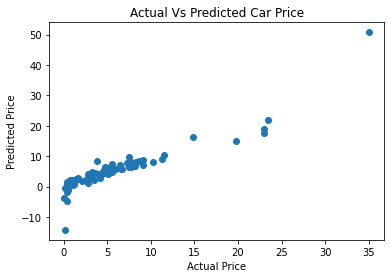

In [ ]:
plt.scatter(y_valid, pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Car Price")
plt.show()

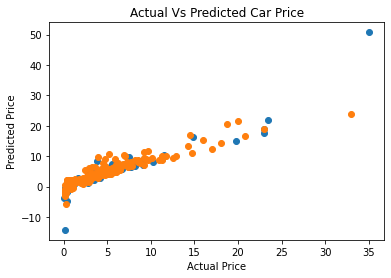

In [ ]:
plt.scatter(y_valid, pred_lr, label = 'Valid')
plt.scatter(y_train, model_lr.predict(X_train), label = 'Train')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Car Price")
plt.show()

In [ ]:
model_lasso = Lasso()

In [ ]:
model_lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print(metrics.r2_score(y_valid, model_lasso.predict(X_valid)))
print(metrics.r2_score(y_train, model_lasso.predict(X_train)))

0.7150292192981096
0.850967201463914


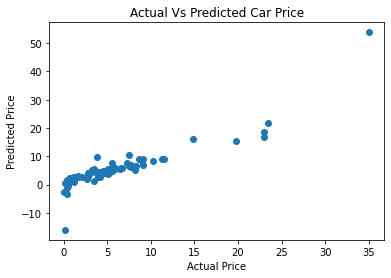

In [ ]:
plt.scatter(y_valid, model_lasso.predict(X_valid))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Car Price")
plt.show()